# Normalization
        Normalization is a technique often applied as part of data preparation for machine learning, the goal of normalization is to change the values of numeric columns in the dataset to use a common scale , without distorting differences in the ranges of values or losing information.
## Types of Normalization
        1.MinMax Scaling
        2.Mean normalization
        3.Max absorbate
        4.Robust Scaling

![Screenshot 2024-03-09 193542.png](<attachment:Screenshot 2024-03-09 193542.png>)
![Screenshot 2024-03-10 095342.png](<attachment:Screenshot 2024-03-10 095342.png>)
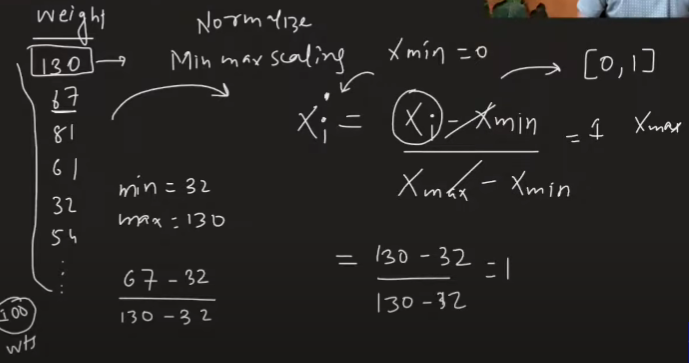
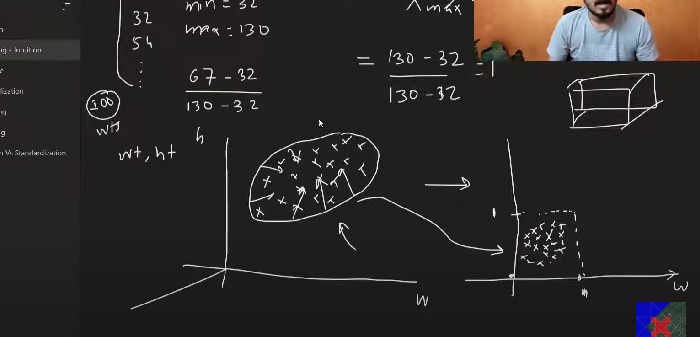

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('D:\Machine_learning\ML_With_Campusx\csv_files\wine_data.csv',header=None,usecols=[0,1,2])

In [3]:
df.columns=['class label','Alcohol','Malic Acid']
df.head()

,class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

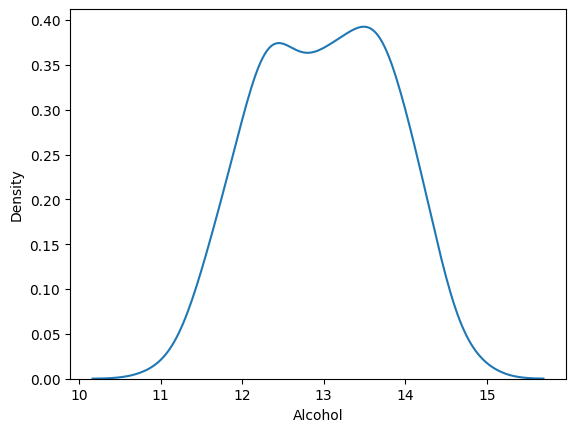

In [4]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

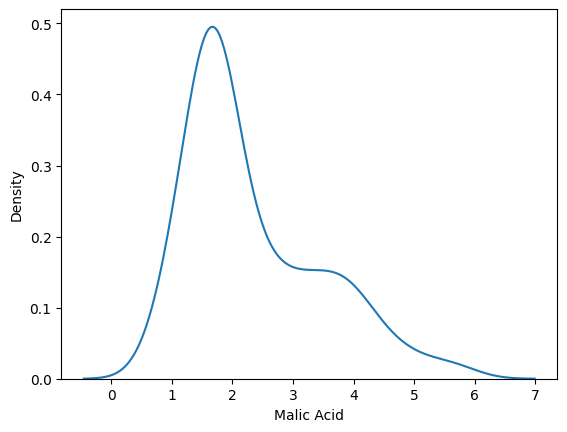

In [5]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

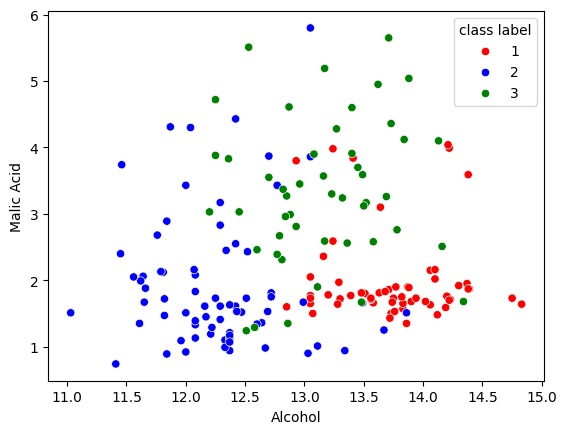

In [6]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic Acid'],hue=df['class label'],palette=color_dict)

In [7]:
x=df.drop(columns=['class label'],axis=0)
y=df['class label']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape, x_test.shape

((124, 2), (54, 2))

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

# fit the scaler to the train set it will learn the parameter 
scaler.fit(x_train)

# transform train and test sets 
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [10]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [11]:
x_train_scaled

,Alcohol,Malic Acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


In [12]:
np.round(x_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [13]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


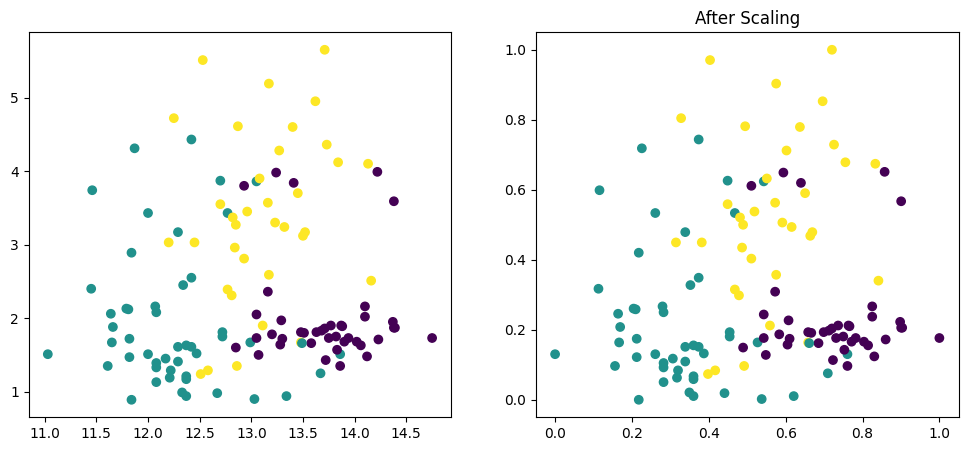

In [18]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Alcohol'],x_train['Malic Acid'],c=y_train)
ax1.set_label('Before Scaling')

ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic Acid'],c=y_train)
ax2.set_title('After Scaling')
plt.show()

Text(0.5, 1.0, 'After Scaling')

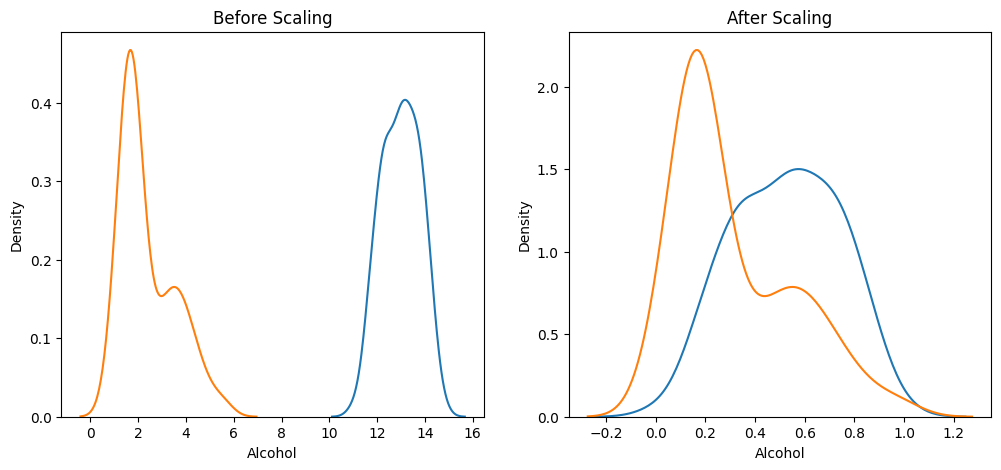

In [26]:
fig , (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic Acid'],ax=ax1)
ax1.set_title('Before Scaling')

sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic Acid'],ax=ax2)
ax2.set_title('After Scaling')

# Mean Normalization

![Screenshot 2024-03-10 104206.png](<attachment:Screenshot 2024-03-10 104206.png>)
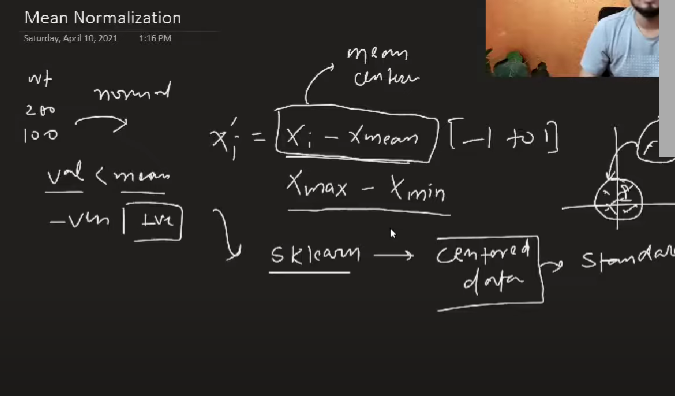

# MaxAbsScaling
    Original value devided by Maximum value
    class=MaxAbsScaler
    use=if more zeroes(0) present.

# Robust Scaling

![Screenshot 2024-03-10 104727.png](<attachment:Screenshot 2024-03-10 104727.png>)
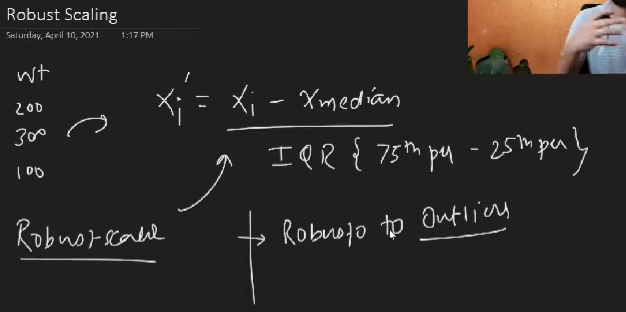

# Normalization Vs Standardization

    1.Is feature scaling required?
    2.Most of the problem solve using Standardization and minmax use when minimum and maximun value given(min,max).